In [1]:
import tensorflow as tf
import numpy as np
import h5py
import scipy.io
from os.path import join 
import os.path
from PIL import Image



from adv_tools_PNAS.automap_config import src_weights, src_data;
from adv_tools_PNAS.adversarial_tools import l2_norm_of_tensor, scale_to_01
from adv_tools_PNAS.Runner import Runner;
from adv_tools_PNAS.Automap_Runner import Automap_Runner;
from adv_tools_PNAS.automap_tools import load_runner, read_automap_k_space_mask, compile_network, hand_f, sample_image;
from scipy.io import loadmat, savemat
import matplotlib.pyplot as plt

runner_id_automap = 5; # Set to 12, to test the knee image perturbations
pert_nbr = 2;

runner = load_runner(runner_id_automap);

N = 128

k_mask_idx1, k_mask_idx2 = read_automap_k_space_mask();

HCP_nbr = 1033
data = loadmat(join(src_data, f'HCP_mgh_{HCP_nbr}_T2_subset_N_128.mat'));
mri_data = data['im'];
im_nbr = 2
# im_nbrs = [37, 50, 76];

# batch_size = 1;
# mri_data.shape[0];

# sess = tf.compat.v1.Session()

# raw_f, _ = compile_network(sess, batch_size)

sample = lambda im: sample_image(im, k_mask_idx1, k_mask_idx2)



    

/home/lfi/anaconda3/envs/danyal_tf114/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/lfi/anaconda3/envs/danyal_tf114/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/lfi/anaconda3/envs/danyal_tf114/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/lfi/anaconda3/envs/danyal_tf114

In [2]:
adv_noise_complex = np.zeros((5,128,128),dtype=complex)

for r_value in range(0,5):

    rr = runner.r[r_value]
    rr = rr[pert_nbr, :, :]
    
    adv_noise_complex[r_value,:,:] = rr
    
    rr = np.expand_dims(rr, 0)


    
    # print(r_value)

Text(0.5, 1.0, 'imag($r_3$)')

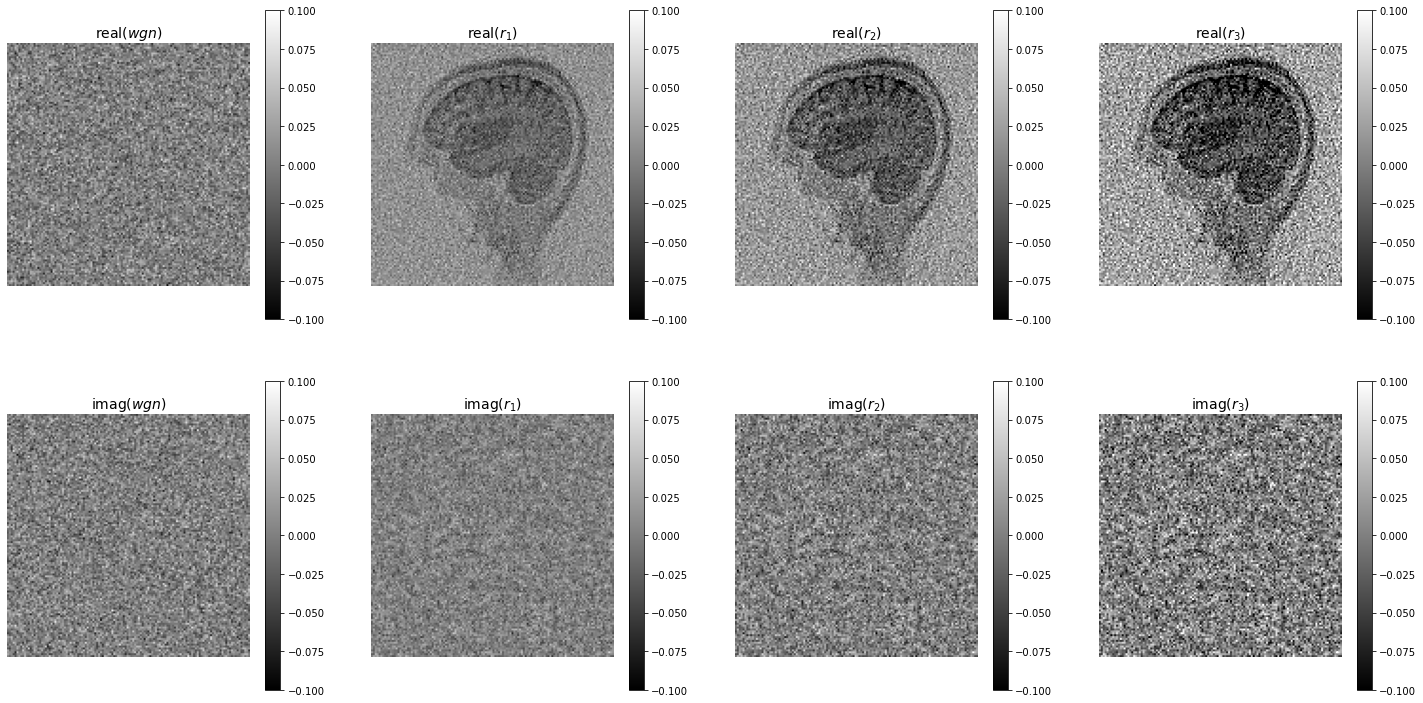

In [7]:
# FIGURE 1

num_imgs = 3
offset = 2

fig, axs = plt.subplots(2, 4,figsize=(20*1.25,10*1.25))


gnoise = 0.025*(np.random.normal(size=(128,128))+1j*np.random.normal(size=(128,128)))

real_im = axs[0,0].imshow(np.real(gnoise),cmap='gray',vmin = -0.1, vmax =0.1)
imag_im = axs[1,0].imshow(np.imag(gnoise),cmap='gray',vmin = -0.1, vmax =0.1)

plt.colorbar(real_im,ax=axs[0,0])
plt.colorbar(imag_im,ax=axs[1,0])

axs[0,0].axis('off')
axs[1,0].axis('off')

for i in range(num_imgs):


    r_value = offset+i

    real_im = axs[0,i+1].imshow(np.real(adv_noise_complex[r_value,:,:]),cmap='gray',vmin = -0.1, vmax =0.1)
    imag_im = axs[1,i+1].imshow(np.imag(adv_noise_complex[r_value,:,:]),cmap='gray',vmin = -0.1, vmax =0.1)

    plt.colorbar(real_im,ax=axs[0,i+1])
    plt.colorbar(imag_im,ax=axs[1,i+1])
    
    axs[0,i+1].axis('off')
    axs[1,i+1].axis('off')


    # plt.imshow(np.real(adv_noise_complex[r_value,:,:]),cmap='gray')
    # plt.colorbar()

# timesfont = {'fontname':'Times New Roman'}
timesfont = {'fontfamily':'serif'}
hfont = {'fontname':'Helvetica'}

axs[0,0].set_title('real($wgn$)',fontsize=14)
axs[0,1].set_title('real($r_1$)',fontsize=14)
axs[0,2].set_title('real($r_2$)',fontsize=14)
axs[0,3].set_title('real($r_3$)',fontsize=14)

axs[1,0].set_title('imag($wgn$)',fontsize=14)
axs[1,1].set_title('imag($r_1$)',fontsize=14)
axs[1,2].set_title('imag($r_2$)',fontsize=14)
axs[1,3].set_title('imag($r_3$)',fontsize=14)


In [8]:
# Noise-to-Signal L2_Norm Ratio
for i in range(2,5):

    refimg = mri_data[im_nbr,:,:]
    real_noise = np.real(adv_noise_complex[i,:,:])
    imag_noise = np.imag(adv_noise_complex[i,:,:])

    refimg_l2 = np.sqrt(np.sum(np.abs(refimg.flatten())**2))
    real_noise_l2 = np.sqrt(np.sum(np.abs(real_noise.flatten())**2))
    imag_noise_l2 = np.sqrt(np.sum(np.abs(imag_noise.flatten())**2))

    print("r"+str(i-1), "real_noise_l2n / signal_l2n:", real_noise_l2/refimg_l2)
    print("r"+str(i-1), "imag_noise_l2n / signal_l2n:", '{0:.15f}'.format(imag_noise_l2/refimg_l2))
    

r1 real_noise_l2n / signal_l2n: 0.12100875396929665
r1 imag_noise_l2n / signal_l2n: 0.095070239338936
r2 real_noise_l2n / signal_l2n: 0.17945083742478307
r2 imag_noise_l2n / signal_l2n: 0.141522352765266
r3 real_noise_l2n / signal_l2n: 0.25294368860469746
r3 imag_noise_l2n / signal_l2n: 0.200347267737731


In [9]:
def zncc(im1,im2):

    im1_zn = (im1 - im1.mean())/im1.std()
    im2_zn = (im2 - im2.mean())/im2.std()

    zncc_out = np.multiply(im1_zn,im2_zn).mean()

    return zncc_out


im1 = np.real(gnoise)
im2 = mri_data[2,:,:]
print('Real Gaussian Noise ZNCC:', abs(zncc(im1,im2)))

im1 = np.imag(gnoise)
im2 = mri_data[2,:,:]
print('Imag Gaussian Noise ZNCC:', abs(zncc(im1,im2)))


num_imgs = 3
offset = 2


for i in range(num_imgs):

    r_value = offset+i
    
    im1 = np.real(adv_noise_complex[r_value,:,:])
    im2 = mri_data[2,:,:]
    print('Real Adversarial Noise (r' + str(i+1) +  ') ZNCC:',abs(zncc(im1,im2)))


    im1 = np.imag(adv_noise_complex[r_value,:,:])
    im2 = mri_data[2,:,:]
    print('Imag Adversarial Noise (r' + str(i+1) +  ') ZNCC:',abs(zncc(im1,im2)))


# plt.imshow(np.real(adv_noise_complex[r_value,:,:])+mri_data[2,:,:])

Real Gaussian Noise ZNCC: 0.008830545706138102
Imag Gaussian Noise ZNCC: 0.007056615062889482
Real Adversarial Noise (r1) ZNCC: 0.6583656434123237
Imag Adversarial Noise (r1) ZNCC: 0.004199601863975427
Real Adversarial Noise (r2) ZNCC: 0.6431433171332014
Imag Adversarial Noise (r2) ZNCC: 0.004250986374035695
Real Adversarial Noise (r3) ZNCC: 0.6205893300006653
Imag Adversarial Noise (r3) ZNCC: 0.0043855257471522545
